# Stemming



In [1]:
import nltk
nltk.download('omw-1.4')
#Open Multilingual Wordnet

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\EMERITUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
plurals = ['caresses', 'flies', 'dies', 'computerized', 'mules', 'died', 'agreed', 'owned', 'humbled', 'sized', 'meeting', 'stating',
           'siezing', 'itemization', 'traditional', 'reference', 'colonizer', 'plotted', 'having', 'generously']

# Porter Stemmer

In [3]:
from nltk.stem.porter import PorterStemmer 
stemmer = PorterStemmer()
singles = [stemmer.stem(plural) for plural in plurals]
#print(singles)
print(' '.join(singles))

caress fli die computer mule die agre own humbl size meet state siez item tradit refer colon plot have gener


# Snowball Stemmer

In [4]:
from nltk.stem.snowball import SnowballStemmer
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [5]:
stemmer2 = SnowballStemmer(language='english')
singles = [stemmer2.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die computer mule die agre own humbl size meet state siez item tradit refer colon plot have generous


# Comparing Stemmers

In [6]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
input_words=['caresses', 'flies', 'dies', 'computerized', 'mules', 'died', 'agreed', 'owned', 'humbled', 'sized', 'meeting', 'stating',
           'siezing', 'itemization', 'traditional', 'reference', 'colonizer', 'plotted', 'having', 'generously']
# Create various stemmer objects
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')
#Create a list of stemmer names for display
stemmer_names = ['PORTER', 'LANCASTER', 'SNOWBALL']
formatted_text = '{:>16}' * (len(stemmer_names) + 1)
print('\n', formatted_text.format('INPUT WORD', *stemmer_names),
                 '\n', '='*68)
# Stem each word and display the output
for word in input_words:
    output = [word, porter.stem(word),
    lancaster.stem(word), snowball.stem(word)]
    print(formatted_text.format(*output))


       INPUT WORD          PORTER       LANCASTER        SNOWBALL 
        caresses          caress          caress          caress
           flies             fli             fli             fli
            dies             die             die             die
    computerized        computer          comput        computer
           mules            mule             mul            mule
            died             die            died             die
          agreed            agre           agree            agre
           owned             own             own             own
         humbled           humbl           humbl           humbl
           sized            size             siz            size
         meeting            meet            meet            meet
         stating           state            stat           state
         siezing            siez            siez            siez
     itemization            item            item            item
     traditional      

# Lemmatization

# Wordnet Lemmatizer

In [7]:
#import nltk
#nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EMERITUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
lemmatizer = WordNetLemmatizer()
s = "What we are putting is efforts  enhancing our understanding of Lemmatization"
s1="This is a longer sentence than the previous examples"
token_list = s.split()
print("The tokens are: ", token_list)
lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token in token_list])
print("The lemmatized output is: ", lemmatized_output)

The tokens are:  ['What', 'we', 'are', 'putting', 'is', 'efforts', 'enhancing', 'our', 'understanding', 'of', 'Lemmatization']
The lemmatized output is:  What we are putting is effort enhancing our understanding of Lemmatization


## POS Tagging

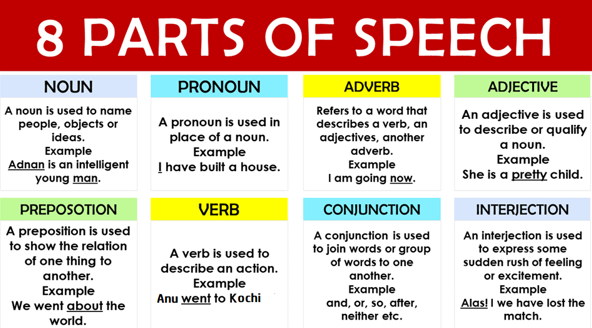

In [9]:
nltk.download('averaged_perceptron_tagger')
pos_tags = nltk.pos_tag(token_list)
pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\EMERITUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('What', 'WP'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('putting', 'VBG'),
 ('is', 'VBZ'),
 ('efforts', 'NNS'),
 ('enhancing', 'VBG'),
 ('our', 'PRP$'),
 ('understanding', 'NN'),
 ('of', 'IN'),
 ('Lemmatization', 'NN')]

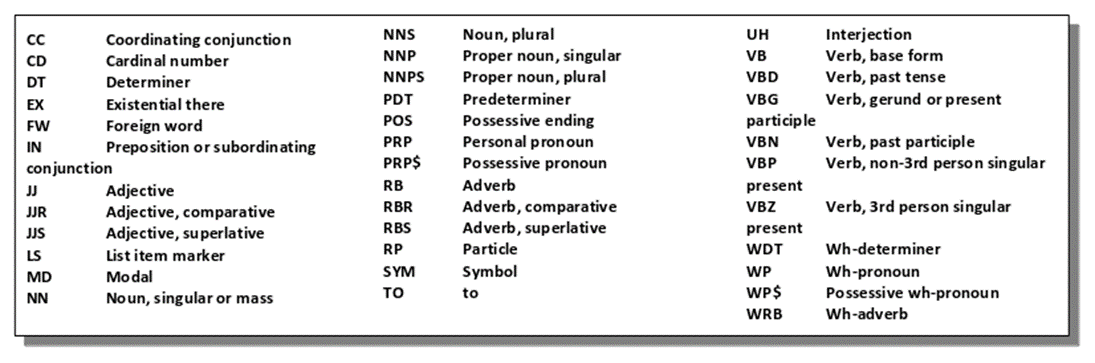

## POS tag Mapping

In [10]:
from nltk.corpus import wordnet

##This is a common method which is widely used across the NLP community of practitioners and readers

def get_part_of_speech_tags(token):
    
    """Maps POS tags to first character lemmatize() accepts.
    We are focussing on Verbs, Nouns, Adjectives and Adverbs here."""

    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    tag = nltk.pos_tag([token])[0][1][0].upper()
    
    return tag_dict.get(tag, wordnet.NOUN)

## Wordnet Lemmatizer with POS Tag Information

In [11]:
lemmatized_output_with_POS_information = [lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list]
print(' '.join(lemmatized_output_with_POS_information))

What we be put be effort enhance our understand of Lemmatization


## Lemmatization vs Stemming

In [12]:
stemmer2 = SnowballStemmer(language='english')
stemmed_sentence = [stemmer2.stem(token) for token in token_list]
print(' '.join(stemmed_sentence))

what we are put is effort enhanc our understand of lemmat


# spaCy Lemmatizer

In [13]:
import nltk
import spacy
#pip install -U pip setuptools wheel
#pip install -U spacy
#python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
doc = nlp("We are putting in efforts to enhance our understanding of Lemmatization")
" ".join([token.lemma_ for token in doc])

'we be put in effort to enhance our understanding of lemmatization'

# Noun and Verb Lemmatizers

In [14]:
from nltk.stem import WordNetLemmatizer
input_words = ['caresses', 'flies', 'dies', 'mules', 'died', 'agreed', 'owned', 'humbled', 'sized', 'meeting', 'stating',
           'siezing', 'itemization', 'traditional', 'reference', 'colonizer', 'plotted', 'having', 'generously', 'calves']
# Create lemmatizer object
lemmatizer = WordNetLemmatizer()
# Create a list of lemmatizer names for display
lemmatizer_names = ['NOUN LEMMATIZER', 'VERB LEMMATIZER']
formatted_text = '{:>24}' * (len(lemmatizer_names) + 1)
print('\n', formatted_text.format('INPUT WORD', *lemmatizer_names), '\n', '='*75)
# Lemmatize each word and display the output
for word in input_words:
    output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='v')]
    print(formatted_text.format(*output))




               INPUT WORD         NOUN LEMMATIZER         VERB LEMMATIZER 
                caresses                  caress                  caress
                   flies                     fly                     fly
                    dies                      dy                     die
                   mules                    mule                   mules
                    died                    died                     die
                  agreed                  agreed                   agree
                   owned                   owned                     own
                 humbled                 humbled                  humble
                   sized                   sized                    size
                 meeting                 meeting                    meet
                 stating                 stating                   state
                 siezing                 siezing                 siezing
             itemization             itemization

# Stopwords

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
", ".join(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EMERITUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"too, now, you're, isn't, needn, on, shan, your, hasn't, before, you've, him, that, weren't, you, that'll, isn, had, ours, were, its, under, be, o, both, wouldn't, if, ve, from, their, she's, to, d, between, have, just, again, don, any, doing, me, them, during, the, we, of, below, mightn't, will, over, been, own, couldn, such, as, ma, out, where, how, into, most, while, can, didn, he, mustn't, needn't, shouldn, they, you'll, having, does, mightn, those, or, it's, aren't, you'd, m, but, hasn, do, i, with, themselves, nor, should've, through, by, y, so, she, itself, and, is, more, doesn, a, weren, herself, ll, against, not, why, ourselves, haven, don't, above, our, this, s, there, myself, hers, few, up, then, down, at, off, was, her, which, yourselves, an, aren, t, ain, it, further, has, did, didn't, should, won't, in, all, won, mustn, wasn't, only, wasn, very, are, than, my, couldn't, hadn, wouldn, here, same, shouldn't, no, yours, being, shan't, what, until, about, other, some, for, be

In [16]:
wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']

stop = set(stopwords.words('english'))

sentence = "how and why are we putting in efforts to enhance our understanding of Lemmatization"

for word in wh_words:
    stop.remove(word)

sentence_after_stopword_removal = [token for token in sentence.split() if token not in stop]
" ".join(sentence_after_stopword_removal)

'how why putting efforts enhance understanding Lemmatization'

# Case Folding

In [17]:
s = "We are putting in efforts to enhance our understanding of Lemmatization"
s = s.lower()
s

'we are putting in efforts to enhance our understanding of lemmatization'

# N-grams

In [18]:
from nltk.util import ngrams
s = "Natural Language Processing is the way to go"
tokens = s.split()
bigrams = list(ngrams(tokens, 2))
[" ".join(token) for token in bigrams]

['Natural Language',
 'Language Processing',
 'Processing is',
 'is the',
 'the way',
 'way to',
 'to go']

In [19]:
s = "Natural Language Processing is the way to go"
tokens = s.split()
trigrams = list(ngrams(tokens, 3))
[" ".join(token) for token in trigrams]

['Natural Language Processing',
 'Language Processing is',
 'Processing is the',
 'is the way',
 'the way to',
 'way to go']